# Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) mini project

In [31]:
pip install  scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"]  = (10, 6)

import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [3]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


#  Simple Linear Regression (SLR) 

In [4]:
df.info

<bound method DataFrame.info of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                       

In [5]:
df.shape

(7385, 12)

In [6]:
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5554,BMW,M4 CS,COMPACT,3.0,6,AM7,Z,14.3,10.4,12.6,22,294
2868,KIA,SPORTAGE,SUV - SMALL,2.4,4,AS6,X,11.4,8.3,10.0,28,231
3467,CADILLAC,ATS AWD,COMPACT,2.0,4,AS8,Z,10.8,7.9,9.5,30,222
2658,GMC,CANYON,PICKUP TRUCK - SMALL,3.6,6,A6,X,13.0,9.2,11.3,25,265
4207,PORSCHE,911 CARRERA 4S,MINICOMPACT,3.0,6,M7,Z,12.1,8.4,10.4,27,243
1846,MERCEDES-BENZ,E 400 4MATIC WAGON,STATION WAGON - MID-SIZE,3.5,6,AS7,Z,12.4,8.8,10.8,26,248
6316,PORSCHE,911 Carrera T,MINICOMPACT,3.0,6,AM7,Z,11.9,9.1,10.6,27,248
4821,GMC,SIERRA FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,X,14.6,10.3,12.7,22,298
5152,MERCEDES-BENZ,C 300 4MATIC COUPE,SUBCOMPACT,2.0,4,A9,Z,10.5,7.8,9.3,30,218
5587,BUICK,Regal,MID-SIZE,2.0,4,AS9,Z,10.6,7.4,9.1,31,214


In [25]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

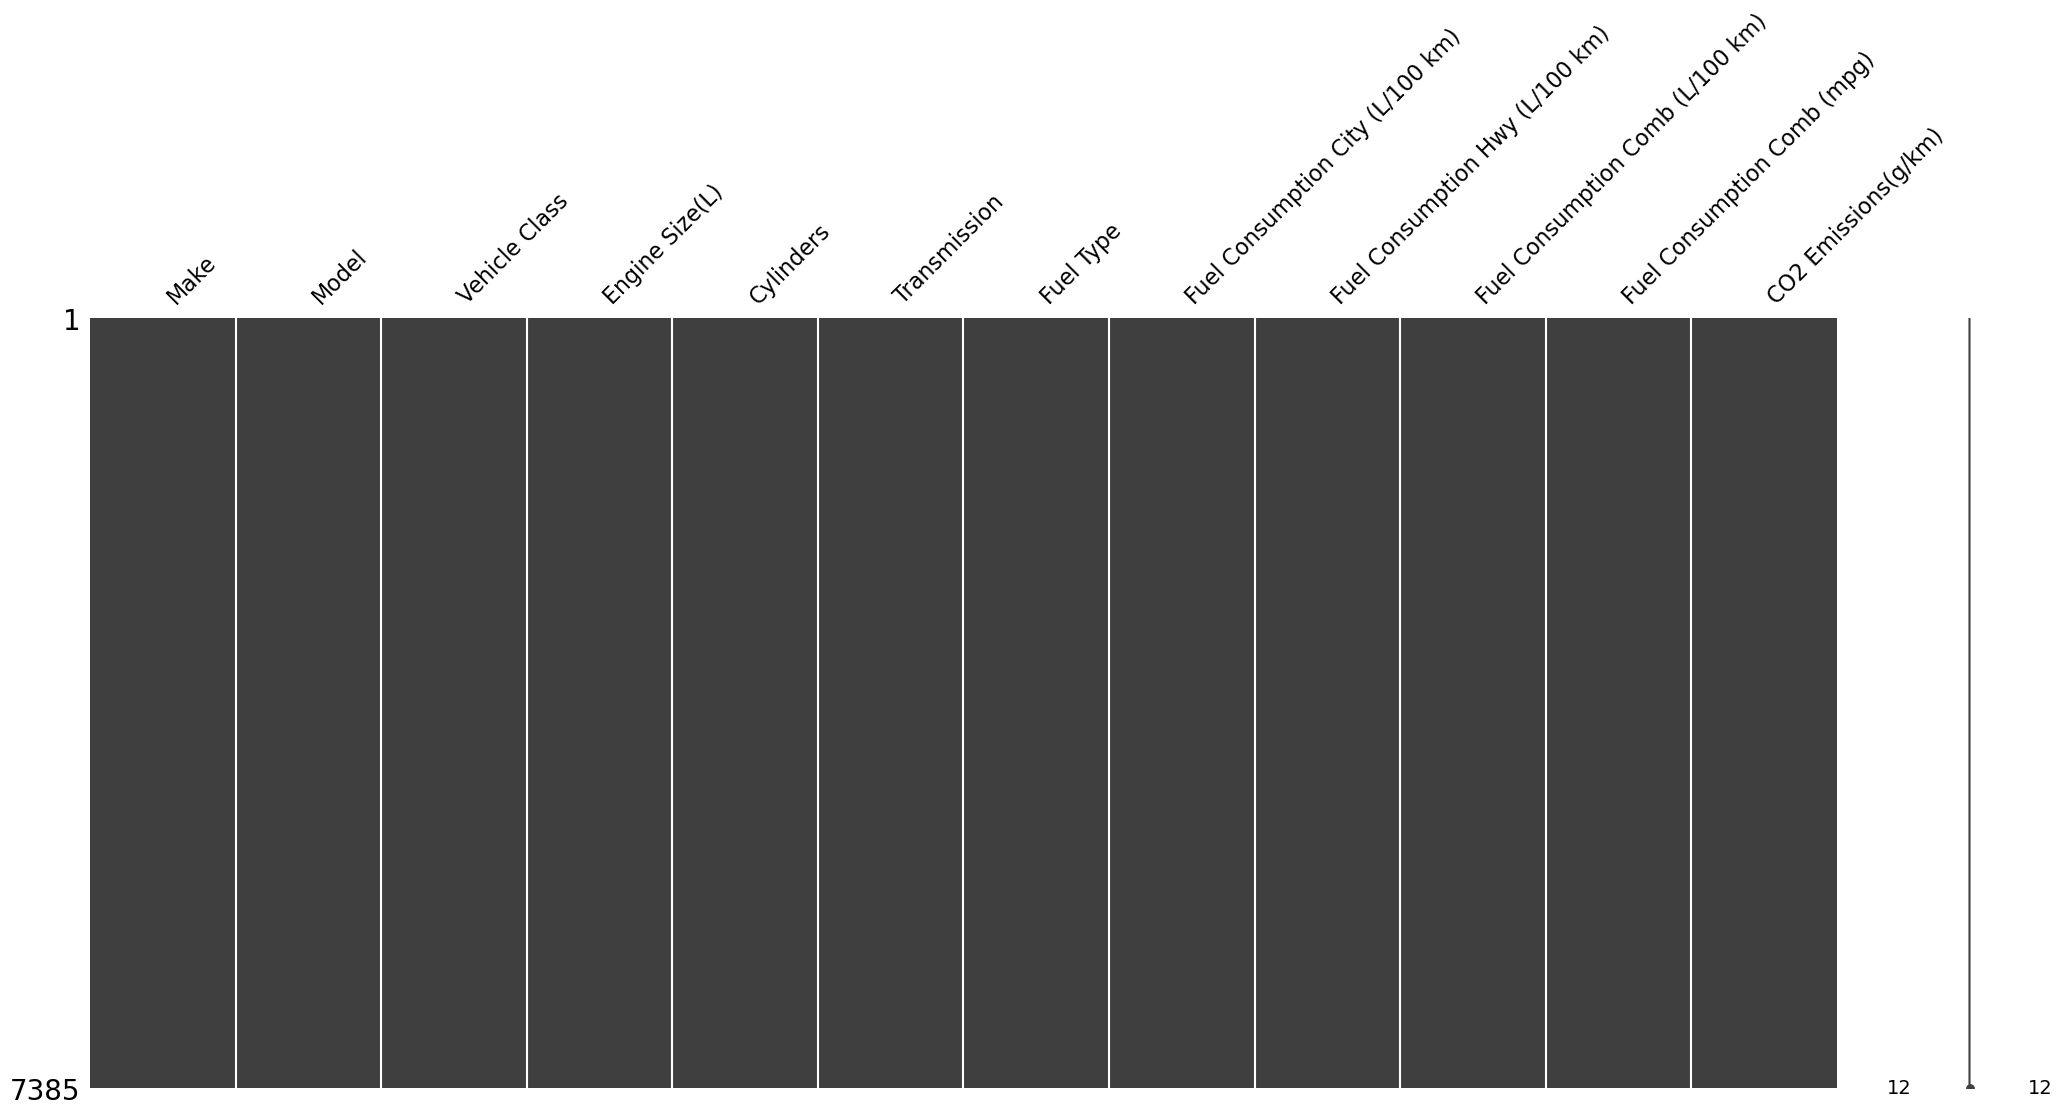

In [26]:
import missingno as msno
msno.matrix(df);

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [28]:
df.corr

<bound method DataFrame.corr of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                       

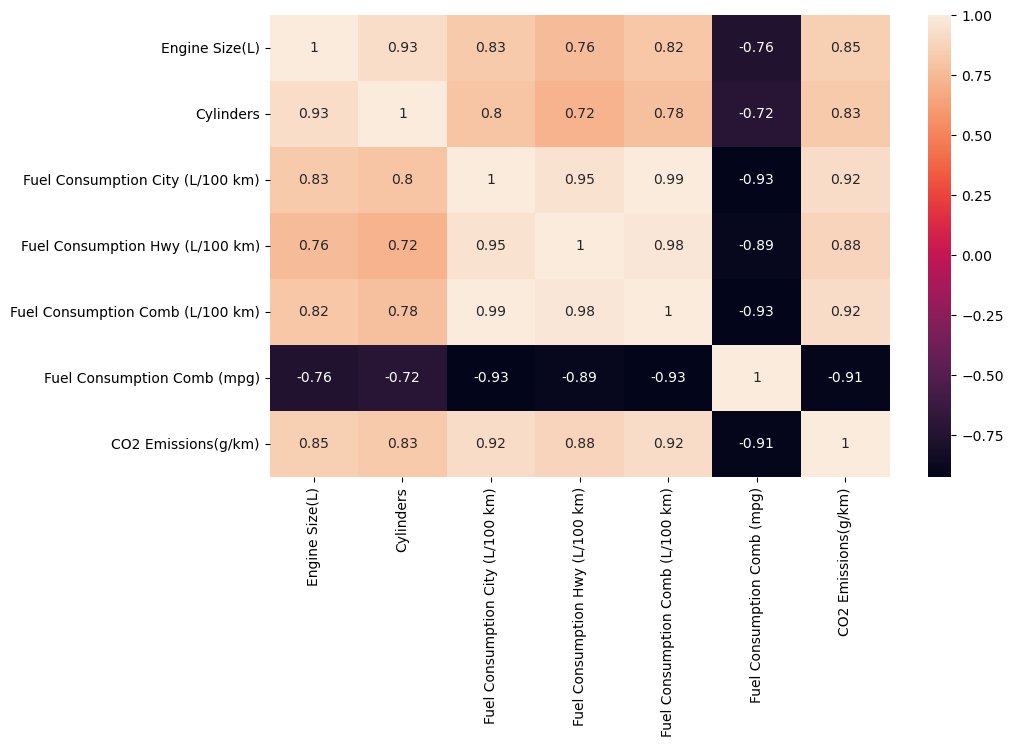

In [29]:
sns.heatmap(df.corr(), annot = True);

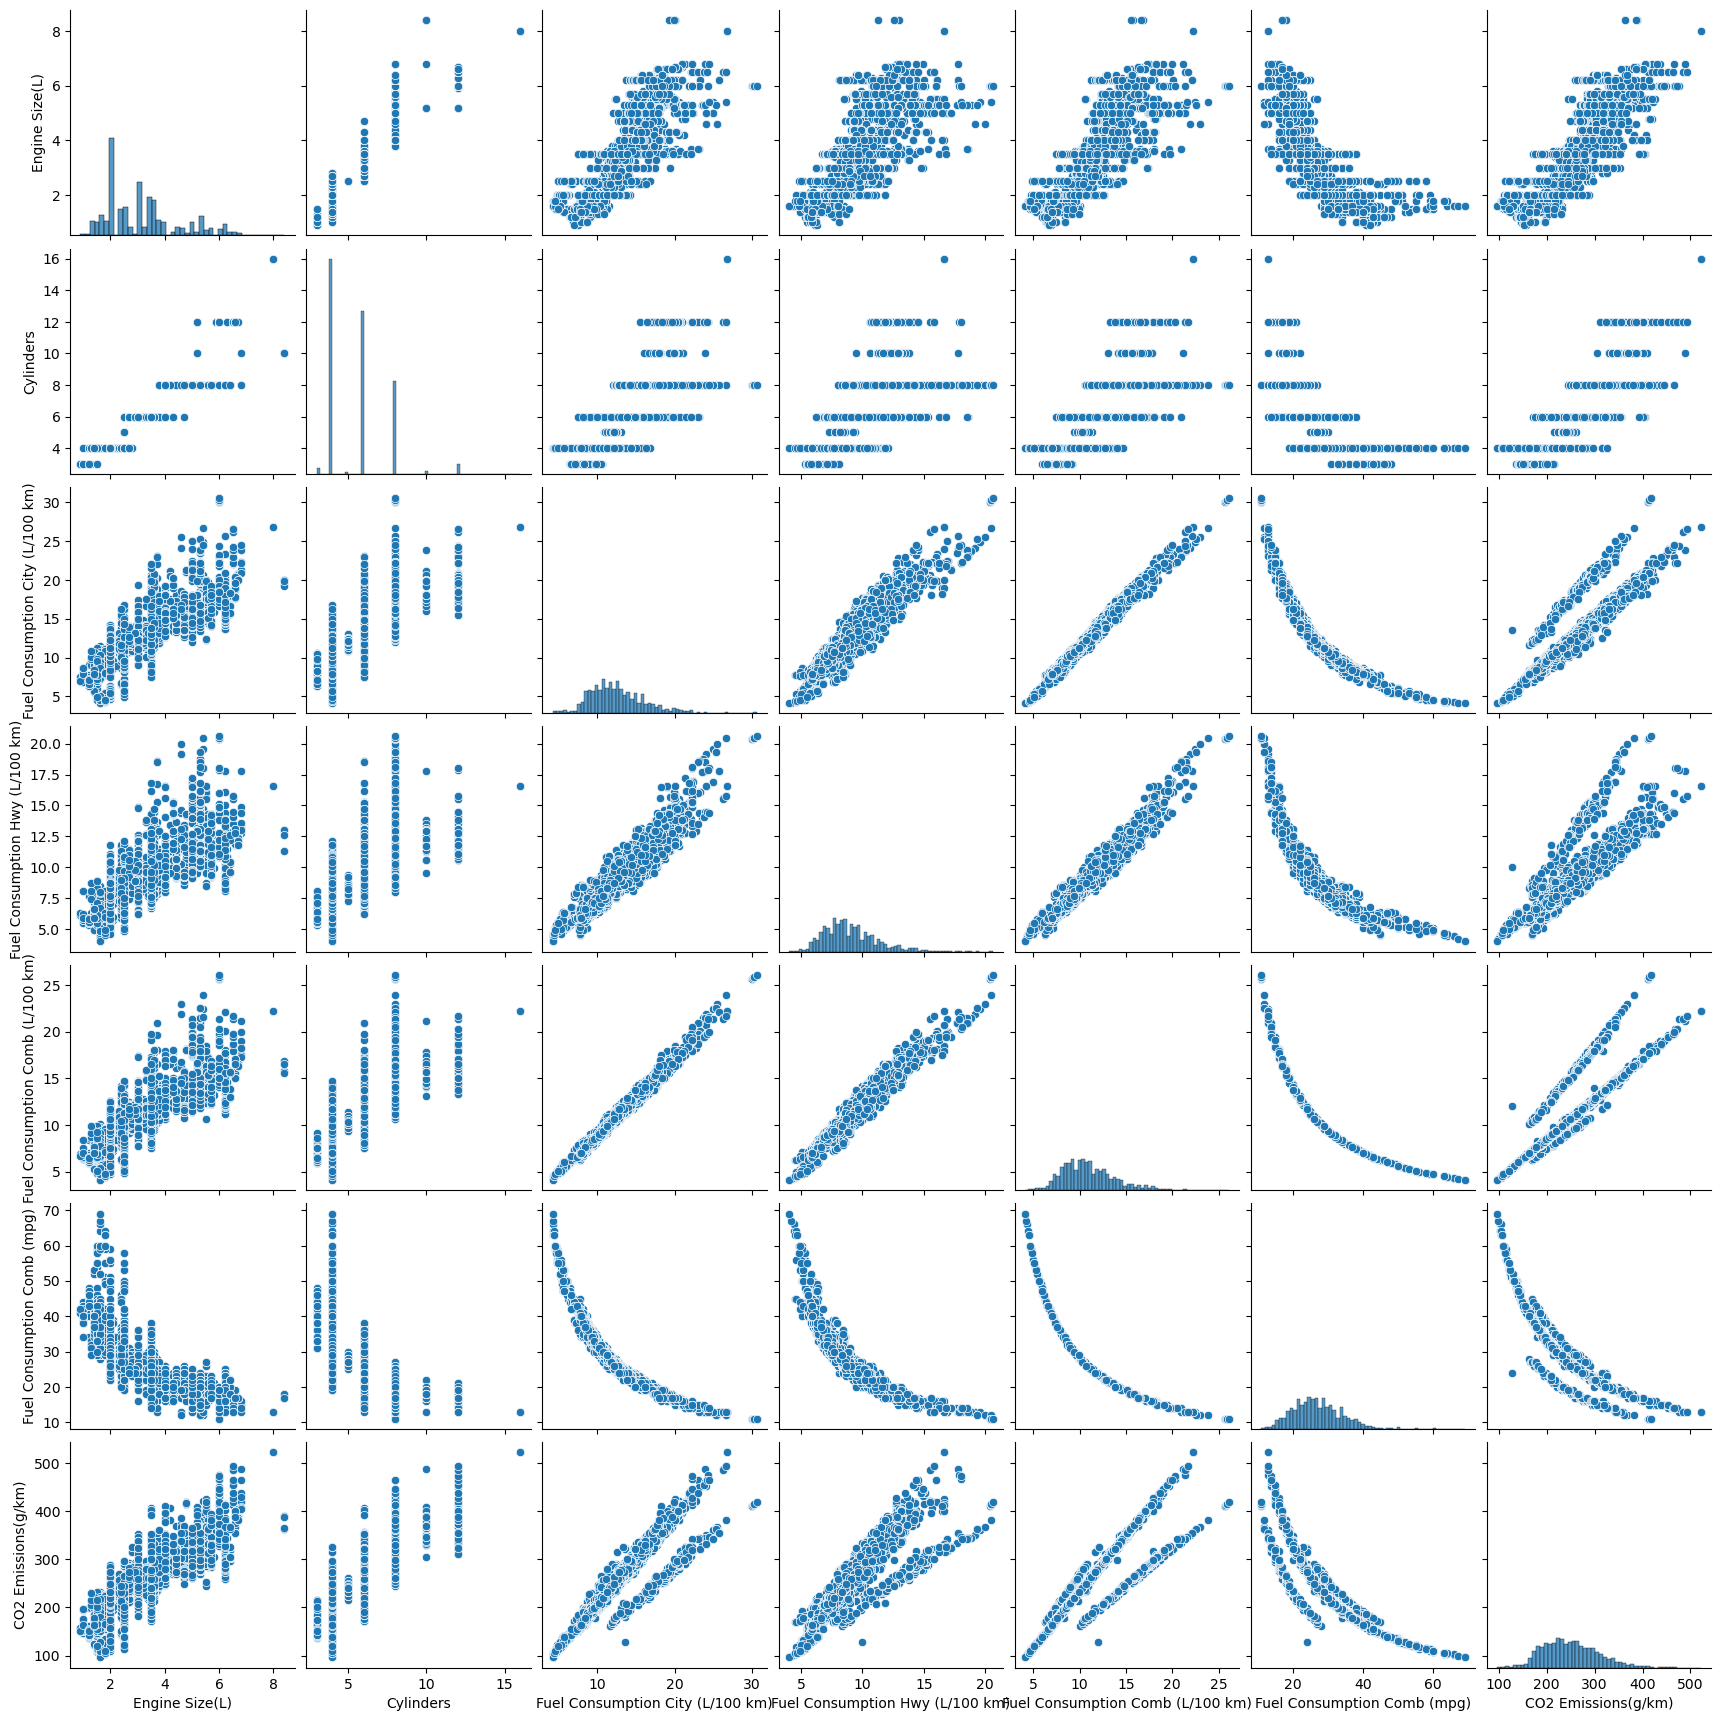

In [30]:
sns.pairplot(df);

In [19]:
df.columns


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [34]:
df = df.iloc[:, [3, 11]]
df.head()

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [35]:
df.corr()

,Engine Size(L),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.851145
CO2 Emissions(g/km),0.851145,1.000000


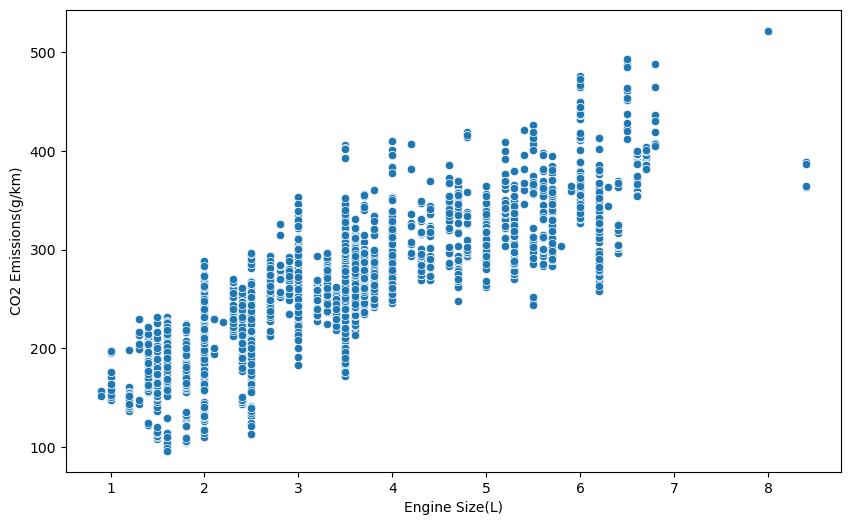

In [36]:
sns.scatterplot(x = "Engine Size(L)", y = "CO2 Emissions(g/km)",data =df);

In [38]:
x = df["Engine Size(L)"]
y = df["CO2 Emissions(g/km)"]

In [39]:
x


0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
7380    2.0
7381    2.0
7382    2.0
7383    2.0
7384    2.0
Name: Engine Size(L), Length: 7385, dtype: float64

In [40]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [41]:
corr = df.y.corr(df.x)
corr

AttributeError: 'DataFrame' object has no attribute 'y'

In [42]:
df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


In [44]:
df = df.rename(columns={'Engine Size(L)': 'Engine_Size'})

In [45]:
df = df.rename(columns={'CO2 Emissions(g/km)': 'CO2_Emissions'})


In [46]:
df

,Engine_Size,CO2_Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


In [47]:
corr = df.Engine_Size.corr(df.CO2_Emissions)
corr

0.8511446437900009

In [48]:
r2_score = corr**2
r2_score 

0.7244472046524075

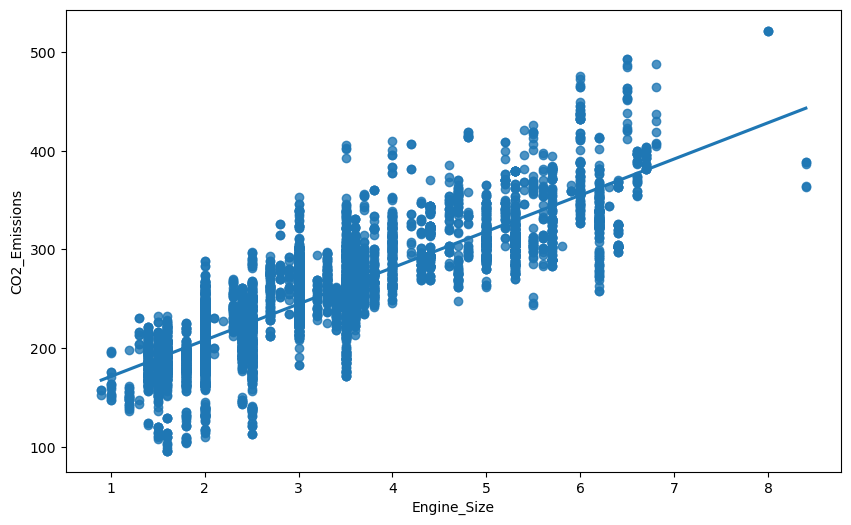

In [49]:
sns.regplot( x = "Engine_Size", y = "CO2_Emissions", data = df, ci = None);

In [50]:
X = df["Engine_Size"]
y = df["CO2_Emissions"]


In [51]:
np.polyfit(X, y, deg = 1)

array([ 36.77731519, 134.36589272])

In [53]:
slope, intercept = np.polyfit(X, y, deg = 1)
print("slope      :", slope)
print("intercept  :", intercept)

slope      : 36.77731518641951
intercept  : 134.3658927234949


In [55]:
b1, b0 =  np.polyfit(X, y, deg = 1) 
print("b1      :", slope)
print("b0      :", intercept)

b1      : 36.77731518641951
b0      : 134.3658927234949


In [56]:
y_pred = b1 * X + b0
y_pred 

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine_Size, Length: 7385, dtype: float64

In [57]:
df.head()

,Engine_Size,CO2_Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [58]:
values = {"actual":y, "predicted":y_pred, "residual": y-y_pred, "LSE" : (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2.head(20)

,actual,predicted,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
5,230,263.086496,-33.086496,1094.716209
6,232,263.086496,-31.086496,966.370226
7,255,270.441959,-15.441959,238.454095
8,267,270.441959,-3.441959,11.847081
9,212,222.631449,-10.631449,113.027711
